# TME 4 : Perceptron et classe Linéaire

### Youcef Benslimane et Maximilien Nowak Abdallah

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mltools import plot_data, plot_frontiere, make_grid, gen_arti

    

class Lineaire(object):
    def __init__(self,loss=perceptron_loss,loss_g=perceptron_grad,max_iter=100,eps=0.01, proj = None):
        self.max_iter, self.eps = max_iter,eps
        self.w = None
        self.loss,self.loss_g = loss,loss_g
        self.proj = proj

        
    def fit(self,datax,datay, include_test = False, testX = None, testY = None):
        #after adding the projection functions
        if(self.proj!=None):
            datax = self.proj(datax)
        datay = datay.reshape(-1, 1)
        N = datax.shape[1]
        self.w = np.random.rand(N,1)
        #print(self.w.shape)
        costs = []
        costs_test = []
        for i in range(self.max_iter):
            costs+=[self.loss(self.w,datax,datay).mean()]
            if include_test:
                costs_test+=[self.loss(self.w, testX, testY).mean()]
            gradient = self.loss_g(self.w,datax,datay)
            #print(gradient.shape)
            self.w = self.w - self.eps * gradient
            #print(self.w.shape)

            
        return self.w, costs, costs_test
    
    def fit_stochastique(self,datax,datay):
        if(self.proj!=None):
            datax = self.proj(datax)
        datay = datay.reshape(-1, 1)
        N = len(datay)
        self.w = np.random.rand(datax.shape[1],1)
        #print(self.w.shape)
        costs=[]
        for i in range(self.max_iter):
            costs+=[self.loss(self.w,datax,datay).mean()]
            gradient = self.loss_g(self.w,datax,datay)
            #print(gradient.shape)
            ind = np.random.randint(len(datax))
            self.w -= self.eps*self.loss_g(self.w, datax[ind],datay[ind])
            #print(self.w.shape)
            
        return self.w, costs
    
    def fit_mini_batch(self,datax,datay,batch_size):
        if(self.proj!=None):
            datax = self.proj(datax)
        datay = datay.reshape(-1, 1)
        N = len(datay)
        self.w = np.random.rand(datax.shape[1],1)
        #print(self.w.shape)
        costs=[]
        for i in range(self.max_iter):
            costs+=[self.loss(self.w,datax,datay).mean()]
            gradient = self.loss_g(self.w,datax,datay)
            #print(gradient.shape)
            inds = np.random.randint(len(datax),size=batch_size)
            #print(inds)
            self.w -= self.eps * self.loss_g(self.w, datax[inds], datay[inds])
            #print(self.w.shape)
            
        return self.w, costs

    def predict(self,datax):
        if len(datax.shape)==1:
            datax = datax.reshape(1,-1)
        if(self.proj!=None):
            datax = self.proj(datax)
        return np.sign(np.dot(datax,self.w)).reshape(-1)

    def score(self,datax,datay):
        return np.mean(self.predict(datax) == datay)
    
    
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    return tmpx,tmpy

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")



if __name__ =="__main__":
    uspsdatatrain = "data/USPS_train.txt"
    uspsdatatest = "data/USPS_test.txt"
    alltrainx,alltrainy = load_usps(uspsdatatrain)
    alltestx,alltesty = load_usps(uspsdatatest)
    neg = 5
    pos = 6
    datax,datay = get_usps([neg,pos],alltrainx,alltrainy)
    testx,testy = get_usps([neg,pos],alltestx,alltesty)


In [64]:
def perceptron_loss(w, x, y):
    return np.maximum(0,-y*np.dot(x,w))

def perceptron_grad(w, x, y):
    m = np.sign(np.maximum(0,-y*np.dot(x, w)))
    return np.mean(m*(-y*x),axis=0).reshape(-1,1)



### Tests sur des données gen_arti

In [65]:
datax, datay = gen_arti(data_type = 0, epsilon=1)

In [66]:
def plot_fit(costs,costs_test = None, title = None): 
    plt.figure()
    plt.title(title)
    plt.ylabel("Couts")
    plt.xlabel("Iterations")
    values = np.arange(len(costs))
    plt.plot(values,costs,color="blue")
    if not (costs_test is None):
        plt.plot(values,costs_test,color="red")
    plt.show()
    

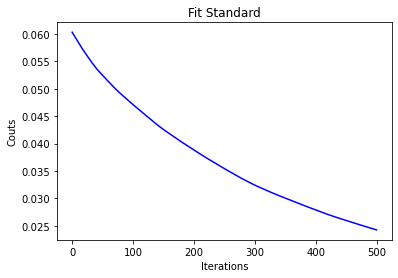

In [67]:
perceptron = Lineaire(max_iter = 500)
_, costs,_ = perceptron.fit(datax,datay)
plot_fit(costs, title = 'Fit Standard')


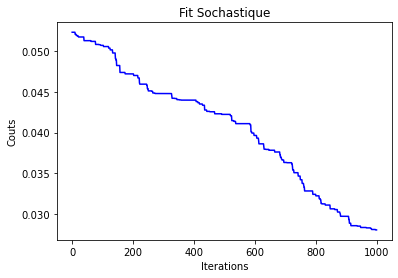

In [68]:
perceptron = Lineaire(max_iter = 1000)
_, costs = perceptron.fit_stochastique(datax,datay)
plot_fit(costs, title = 'Fit Sochastique')

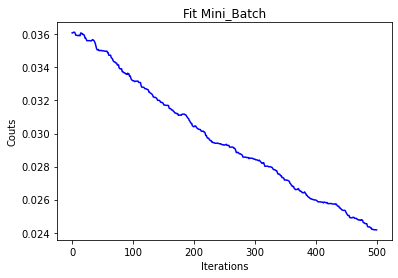

In [69]:
perceptron = Lineaire(max_iter = 500)
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plot_fit(costs, title = 'Fit Mini_Batch')

# Partie Données USPS + Mini batch et descente stochastique

#### 6v9

In [70]:
neg = 9
pos = 6
datax,datay = get_usps([neg,pos],alltrainx,alltrainy)
testx,testy = get_usps([neg,pos],alltestx,alltesty)
datay = np.where(datay==neg,-1,1)

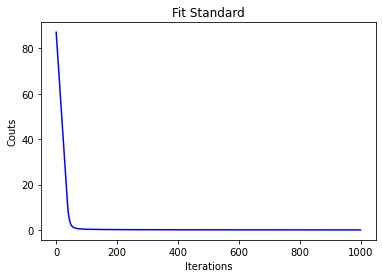

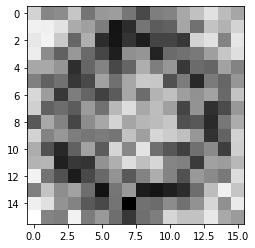

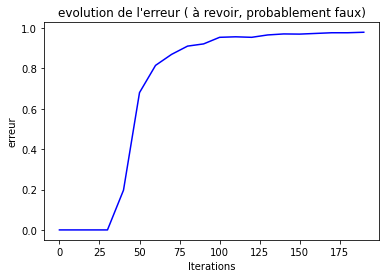

In [81]:
perceptron = Lineaire(max_iter = 1000)
_, costs, costs_test = perceptron.fit(datax,datay, include_test = True, testX = testx, testY = testy)
plot_fit(costs, title = 'Fit Standard')
show_usps(perceptron.w)

v_train, v_test = [], []
for i in range(0,200,10):
    p = Lineaire(max_iter = i)
    p.fit(datax,datay, include_test = True, testX = testx, testY = testy)
    v_train.append(p.score(datax,datay))
    v_test.append(p.score(testx,testy))
    
plt.figure()
plt.title("evolution de l'erreur ( à revoir, probablement faux)")
plt.ylabel("erreur")
plt.xlabel("Iterations")
plt.plot(range(0,200,10),v_train,label ="Apprentissage",color='blue')
#plt.plot(range(0,200,10),v_test,label ="Test",color='red')
plt.show()


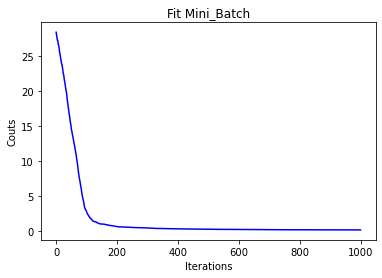

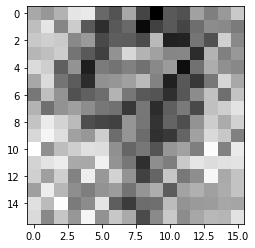

In [72]:
perceptron = Lineaire(max_iter = 1000)
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plot_fit(costs, title = 'Fit Mini_Batch')
show_usps(perceptron.w)

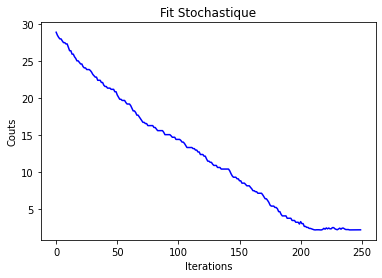

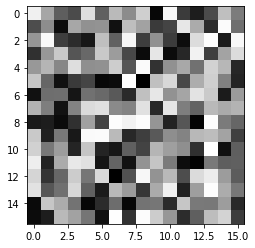

In [73]:
perceptron = Lineaire(max_iter = 250)
_, costs = perceptron.fit_stochastique(datax,datay)
plot_fit(costs, title = 'Fit Stochastique')
show_usps(perceptron.w)

#### 1 vs ALL

In [74]:
datax,datay = get_usps(False,alltrainx,alltrainy)
testx,testy = get_usps(False,alltestx,alltesty)
datay = np.where(datay==1,1,-1)

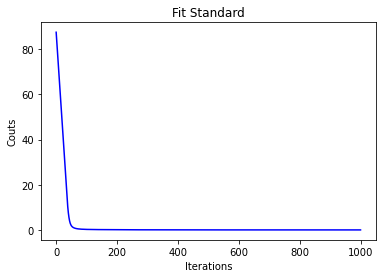

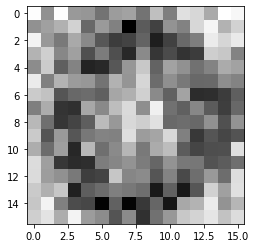

In [75]:
perceptron = Lineaire(max_iter = 1000)
#_, costs, costs_test = perceptron.fit(datax,datay, include_test = True, testX = testx, testY = testy)
#plot_fit(costs, costs_test = costs_test, title = 'Fit Standard')
_, costs, costs_test = perceptron.fit(datax,datay)
plot_fit(costs, title = 'Fit Standard')
show_usps(perceptron.w)


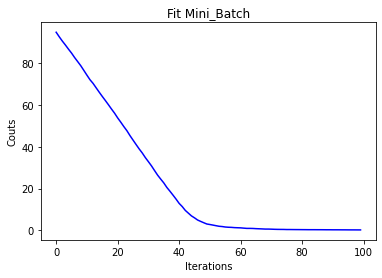

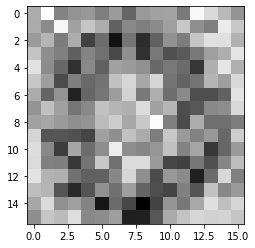

In [76]:
perceptron = Lineaire()
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plot_fit(costs, title = 'Fit Mini_Batch')
show_usps(perceptron.w)

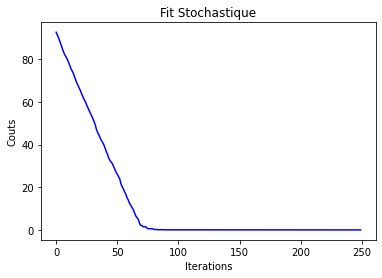

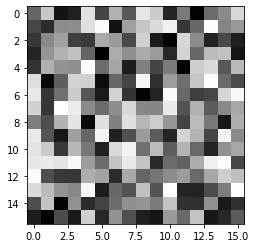

In [77]:
perceptron = Lineaire(max_iter = 250)
_, costs = perceptron.fit_stochastique(datax,datay)
plot_fit(costs, title = 'Fit Stochastique')
show_usps(perceptron.w)

# Projections et pénalisation

In [78]:
def proj_poly(datax):
    return np.concatenate(([[1]]*datax.shape[0],datax,datax**2),axis = 1)

def proj_biais(datax):
    return np.concatenate(([[1]]*datax.shape[0],datax),axis = 1)

#def proj_gauss(datax, base, sigma):
#    pass

In [79]:
import itertools as it
def proj_gauss(dataX, grid_size=10,sigma=0.5,K=1):
    # Création d'une grille 2D,
    x_max = np.max(dataX)
    x_min = np.min(dataX)
    x = np.linspace(x_min,x_max,grid_size)
    pij = np.array(list(it.product(x, x)))
    # initialisation,
    s = np.zeros((len(dataX),grid_size**2))
    # puis projection pour chaque exemple.
    for i in range(len(dataX)):
        # Vecteur de taille grid_size**2
        n = np.linalg.norm(dataX[i]-pij,ord=2,axis=1) 
        s[i] = K*np.exp(-(n**2)/sigma)
    return s

### Data type  == 1

In [82]:
datax, datay = gen_arti(data_type = 1, epsilon=0.1)

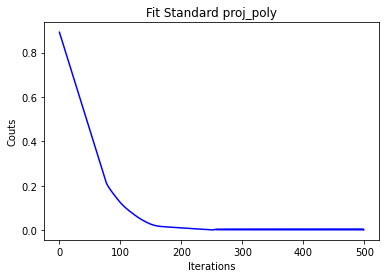

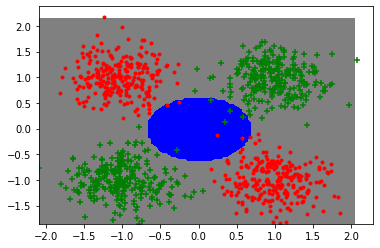

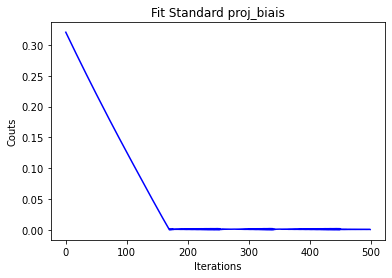

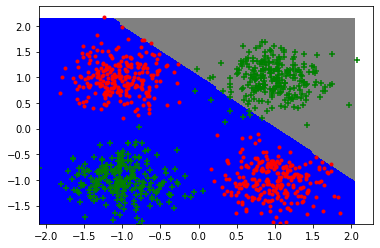

In [83]:
perceptron = Lineaire(max_iter = 500, proj = proj_poly)
_, costs,_ = perceptron.fit(datax,datay)
plot_fit(costs, title = 'Fit Standard proj_poly')


grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
plot_frontiere(datax, lambda x: perceptron.predict(x), step=100)
plot_data(datax, datay)
plt.show()


perceptron = Lineaire(max_iter = 500, proj = proj_biais)
_, costs,_ = perceptron.fit(datax,datay)
plot_fit(costs, title = 'Fit Standard proj_biais')


grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
plot_frontiere(datax, lambda x: perceptron.predict(x), step=100)
plot_data(datax, datay)
plt.show()

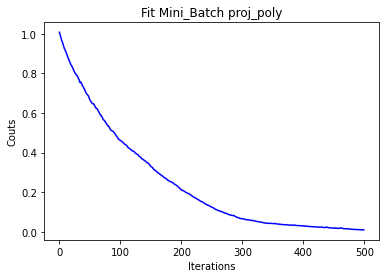

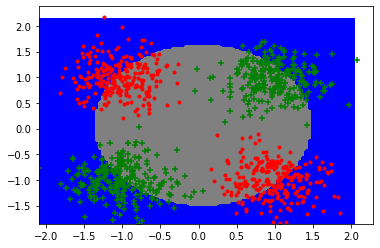

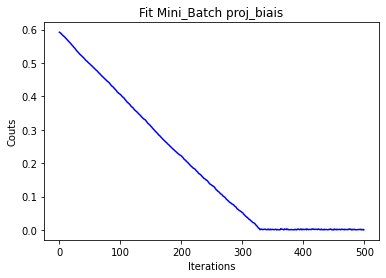

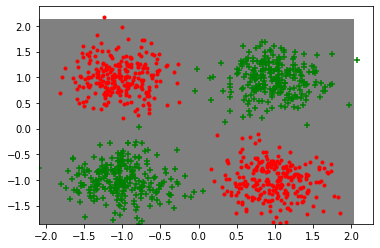

In [84]:
perceptron = Lineaire(max_iter = 500, proj = proj_poly)
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plot_fit(costs, title = 'Fit Mini_Batch proj_poly')

grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
plot_frontiere(datax, lambda x: perceptron.predict(x), step=100)
plot_data(datax, datay)
plt.show()


perceptron = Lineaire(max_iter = 500, proj = proj_biais)
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plot_fit(costs, title = 'Fit Mini_Batch proj_biais')


grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
plot_frontiere(datax, lambda x: perceptron.predict(x), step=100)
plot_data(datax, datay)
plt.show()

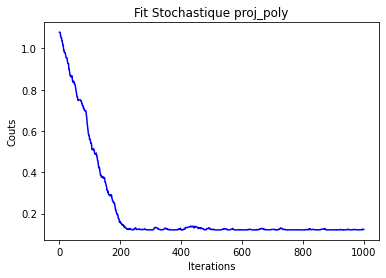

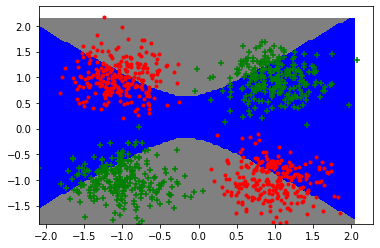

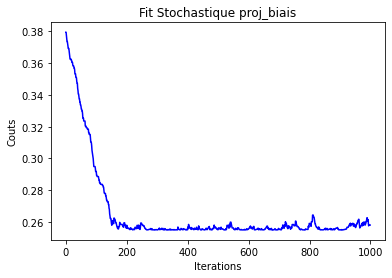

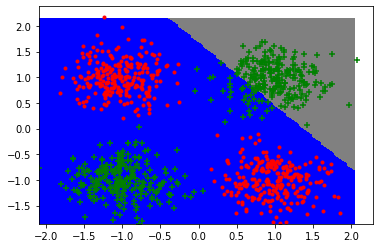

In [85]:
perceptron = Lineaire(max_iter = 1000, proj = proj_poly)
_, costs = perceptron.fit_stochastique(datax,datay)
plot_fit(costs, title = 'Fit Stochastique proj_poly')

grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
plot_frontiere(datax, lambda x: perceptron.predict(x), step=100)
plot_data(datax, datay)
plt.show()



perceptron = Lineaire(max_iter = 1000, proj = proj_biais)
_, costs = perceptron.fit_stochastique(datax,datay)
plot_fit(costs, title = 'Fit Stochastique proj_biais')



grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
plot_frontiere(datax, lambda x: perceptron.predict(x), step=100)
plot_data(datax, datay)
plt.show()

### Data type  == 2

In [86]:
datax, datay = gen_arti(data_type = 2, epsilon=0.1)

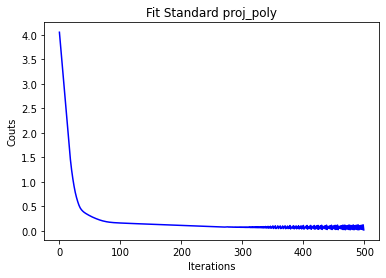

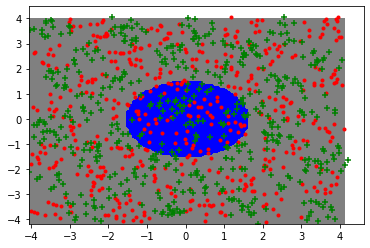

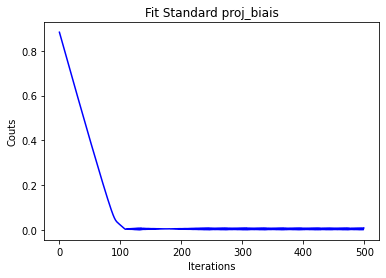

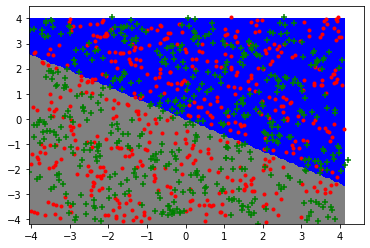

In [87]:
perceptron = Lineaire(max_iter = 500, proj = proj_poly)
_, costs,_ = perceptron.fit(datax,datay)
plot_fit(costs, title = 'Fit Standard proj_poly')


grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
plot_frontiere(datax, lambda x: perceptron.predict(x), step=100)
plot_data(datax, datay)
plt.show()


perceptron = Lineaire(max_iter = 500, proj = proj_biais)
_, costs,_ = perceptron.fit(datax,datay)
plot_fit(costs, title = 'Fit Standard proj_biais')
#show_usps(perceptron.w)

grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
plot_frontiere(datax, lambda x: perceptron.predict(x), step=100)
plot_data(datax, datay)
plt.show()

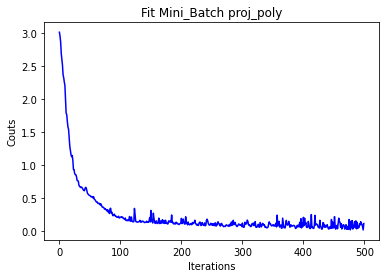

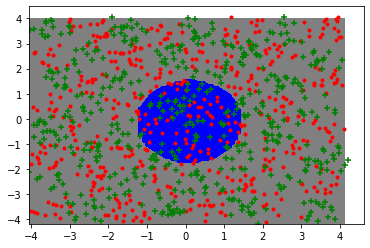

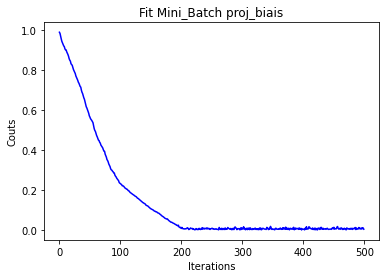

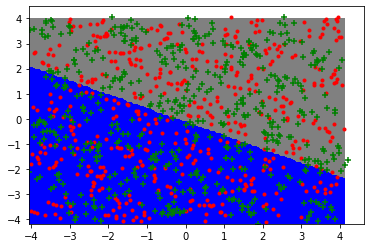

In [88]:
perceptron = Lineaire(max_iter = 500, proj = proj_poly)
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plot_fit(costs, title = 'Fit Mini_Batch proj_poly')

grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
plot_frontiere(datax, lambda x: perceptron.predict(x), step=100)
plot_data(datax, datay)
plt.show()


perceptron = Lineaire(max_iter = 500, proj = proj_biais)
_, costs = perceptron.fit_mini_batch(datax,datay,10)
plot_fit(costs, title = 'Fit Mini_Batch proj_biais')


grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
plot_frontiere(datax, lambda x: perceptron.predict(x), step=100)
plot_data(datax, datay)
plt.show()

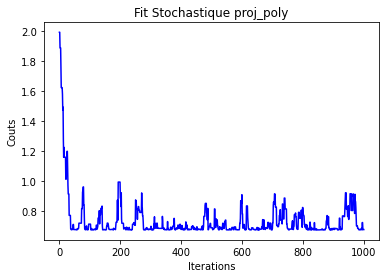

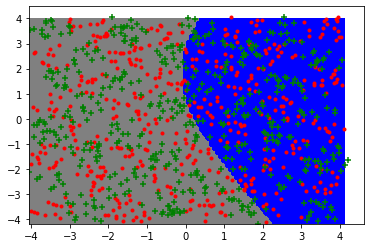

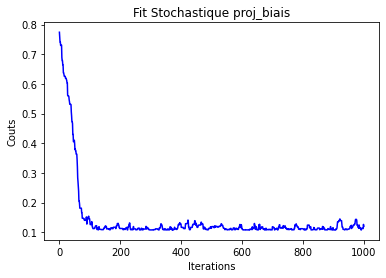

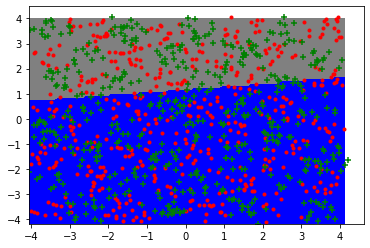

In [89]:
perceptron = Lineaire(max_iter = 1000, proj = proj_poly)
_, costs = perceptron.fit_stochastique(datax,datay)
plot_fit(costs, title = 'Fit Stochastique proj_poly')


grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
plot_frontiere(datax, lambda x: perceptron.predict(x), step=100)
plot_data(datax, datay)
plt.show()

perceptron = Lineaire(max_iter = 1000, proj = proj_biais)
_, costs = perceptron.fit_stochastique(datax,datay)
plot_fit(costs, title = 'Fit Stochastique proj_biais')


grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
plot_frontiere(datax, lambda x: perceptron.predict(x), step=100)
plot_data(datax, datay)
plt.show()